## Programming for A&A - Assignment 1
## Kaya Han Taş - 15064735

### 1-) Write a function which reads in the header and returns a dictionary which maps the station name on to the station number.

In [3]:
#We define a function which reads the file we provide, creates a dictionary
def stations(filename):
    """Opens the given file, checks the lines that has numbers in the beginning
    and creates a dictionary with the station names and nuber."""
    with open(filename, "r") as file: #Opening the file
        list_of_stations=[] #Defining list for stations
        station_name_and_number={} #Defining dictionary for station numbers & names
        
        for line in file: #Checking the lines in the file
            if line[0]=="#":
                try:
                    if int(line[2:5]): #Check if the line has a "number"
                        line = line.strip("# ")
                        line = line.strip("\n")
                        line = line.split("  ")
                        list_of_stations.append(line)
                
                except:
                    ValueError #If the line doesn't have a number, this skips it
            
            else:
                continue
            
        for i in range(len(list_of_stations)): #Checks every sublist and pulls 
            #the index of numbers & station names
            station_name_and_number[list_of_stations[i][-1]]=int(list_of_stations[i][0].strip(":"))
    
    return station_name_and_number

stations("KNMI_20200825.txt")

{'IJMOND': 209,
 'VALKENBURG': 210,
 'VOORSCHOTEN': 215,
 'IJMUIDEN': 225,
 'DE KOOY': 235,
 'SCHIPHOL': 240,
 'VLIELAND': 242,
 'WIJDENES': 248,
 'BERKHOUT': 249,
 'HOORN (TERSCHELLING)': 251,
 'WIJK AAN ZEE': 257,
 'HOUTRIBDIJK': 258,
 'DE BILT': 260,
 'SOESTERBERG': 265,
 'STAVOREN': 267,
 'LELYSTAD': 269,
 'LEEUWARDEN': 270,
 'MARKNESSE': 273,
 'DEELEN': 275,
 'LAUWERSOOG': 277,
 'HEINO': 278,
 'HOOGEVEEN': 279,
 'EELDE': 280,
 'HUPSEL': 283,
 'HUIBERTGAT': 285,
 'NIEUW BEERTA': 286,
 'TWENTHE': 290,
 'CADZAND': 308,
 'VLISSINGEN': 310,
 'HOOFDPLAAT': 311,
 'OOSTERSCHELDE': 312,
 'VLAKTE V.D. RAAN': 313,
 'HANSWEERT': 315,
 'SCHAAR': 316,
 'WESTDORPE': 319,
 'WILHELMINADORP': 323,
 'STAVENISSE': 324,
 'HOEK VAN HOLLAND': 330,
 'THOLEN': 331,
 'WOENSDRECHT': 340,
 "R'DAM-GEULHAVEN": 343,
 'ROTTERDAM': 344,
 'CABAUW': 348,
 'GILZE-RIJEN': 350,
 'HERWIJNEN': 356,
 'EINDHOVEN': 370,
 'VOLKEL': 375,
 'ELL': 377,
 'MAASTRICHT': 380,
 'ARCEN': 391}

### 2-) Write a function which reads in the last-but-one line of the header with the list of variable names and returns a dictionary to map a variable name to its position in the list (starting with 0), i.e. to map a variable to the corresponding column index in the data.

In [4]:
def var_index(filename):
    """Opens the given file, checks the lines that has "#" in the beginning,
    counts them and finds out the last line's index in order to create a 
    dictionary with variable names including their indices starting from 
    zero."""
    with open(filename, "r") as file:
        variable_names=[] #Defining list for variable names
        variable_positions={} #Defining dictionary for variable & their indices
        
        x=-1 #A count, we want to find how long the header is.
        #We start at "-1" because our first line must have the index "0"
        
        for line in file:    
            if line[0]=="#":
                x+=1
            
            else:
                continue
        
        file.seek(0) #To re-read the file again since we have looped before.
        
        for i, line in enumerate(file):
            if i==x-1: #Now we can get the line we are seeking.
                line = line.strip("# ")
                line = line.strip("\n")
                line = line.replace(" ","") #Replaces/removes all the whitespaces
                line = line.split(",")
                variable_names = line
                break
        
        for i in range(len(variable_names)): #We fill the dictionary
            variable_positions[variable_names[i]]=i
        
        return variable_positions

var_index("KNMI_20200825.txt")

{'STN': 0,
 'YYYYMMDD': 1,
 'DDVEC': 2,
 'FHVEC': 3,
 'FG': 4,
 'FHX': 5,
 'FHXH': 6,
 'FHN': 7,
 'FHNH': 8,
 'FXX': 9,
 'FXXH': 10,
 'TG': 11,
 'TN': 12,
 'TNH': 13,
 'TX': 14,
 'TXH': 15,
 'T10N': 16,
 'T10NH': 17,
 'SQ': 18,
 'SP': 19,
 'Q': 20,
 'DR': 21,
 'RH': 22,
 'RHX': 23,
 'RHXH': 24,
 'PG': 25,
 'PX': 26,
 'PXH': 27,
 'PN': 28,
 'PNH': 29,
 'VVN': 30,
 'VVNH': 31,
 'VVX': 32,
 'VVXH': 33,
 'NG': 34,
 'UG': 35,
 'UX': 36,
 'UXH': 37,
 'UN': 38,
 'UNH': 39,
 'EV24': 40}

### 3-) Write a function which reads in all the data (following the header), returning it as a nested list (i.e. a list of lists, where each list within the main list corresponds to a row of data). Empty fields should be replaced with the Python value "None" and you should convert the first column (station number) into an integer. The second column (date) may be kept as a string and be converted or modified later. The remaining values should be converted into floats (they are continuous values, even if rounded to whole numbers).

In [5]:
def dataset_func(filename):
    with open(filename,"r") as file:
        dataset_values=[]
        for line in file:
        #for i in range(110):
            #line = file.readline()
            if line[0]!="#": #If the lines don't have #, it has data.
                line = line.strip("\n")
                line = line.split(",")
                for i in range(len(line)):
                    if i==0: #Converting station number into integer
                        line[i] = int(line[i])
                    
                    elif line[i]=="     ": #Replacing blank data with None
                        line[i] = None
                    
                    elif i!=0 and i!=1 and line[i]!=None: #Converting data to floats (Except column 1&2)
                        line[i] = line[i].replace(" ", "")
                        line[i] = float(line[i])
                
                dataset_values.append(line)
        
        return(dataset_values)

result=dataset_func("KNMI_20200825.txt"); #To avoid printing the whole thing (it will slow down jupyter)
#You can print any part of the dataset by providing the index & running the code below

In [4]:
result[5]

[209,
 '20010204',
 115.0,
 52.0,
 75.0,
 110.0,
 24.0,
 50.0,
 15.0,
 140.0,
 23.0,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### 4-) Finally, write a function that uses the outputs from the three functions described above, along with a station name (not a number!) and a set of variable names, to make a plot for the given station with 4 panels showing: the monthly averages of maximum temperature (in Celcius), minimum temperature (in Celcius), daily sum of precipitation (in mm/hour), duration of sunshine (in hours). I.e. for each month, the quantities are averaged over the whole time period covered by the data for that station, and plotted vs. the month on the x-axis.

### Be sure to label your plots appropriately! You should demonstrate your code in your notebook by making these multi-panel plots for at least 2 stations. Note that some stations may not be suitable (e.g. with too short a time period, or with the physical quantities themselves missing), so you may have to experiment before deciding what to show in your submitted notebook.

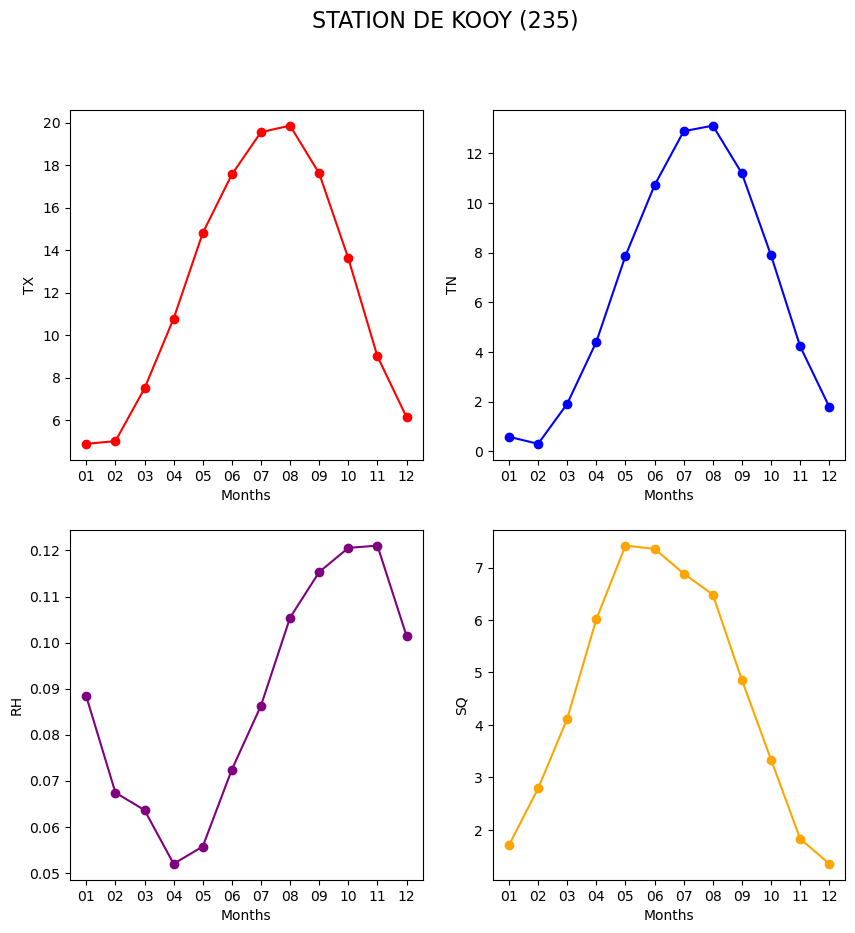

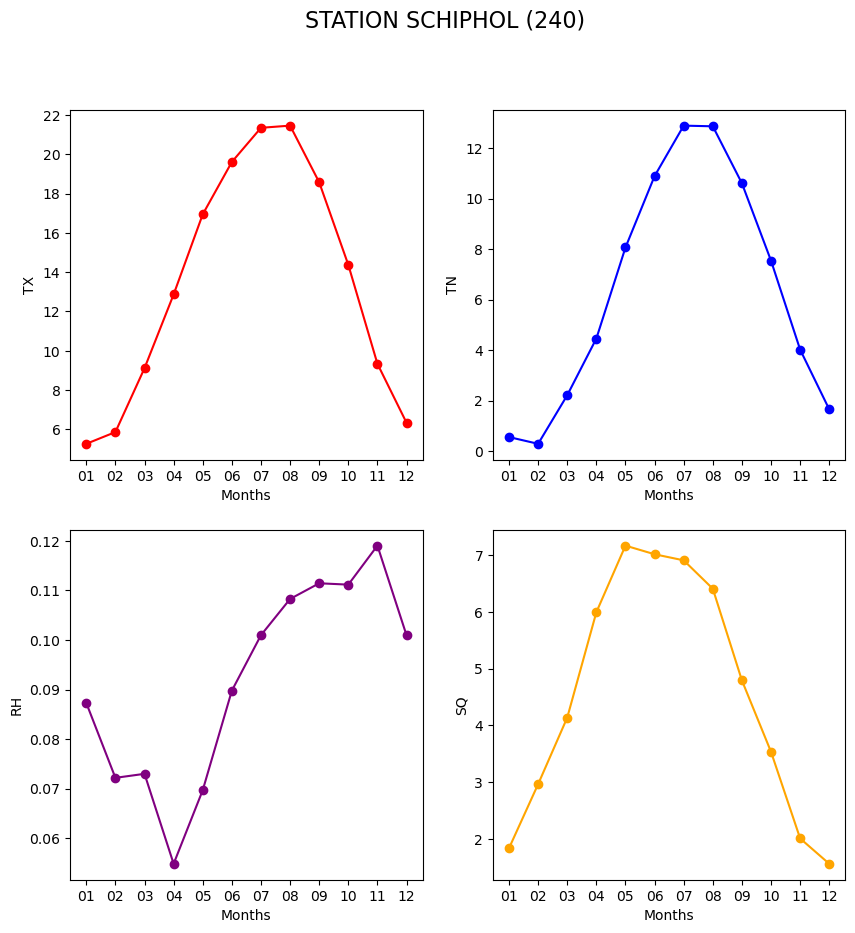

In [14]:
#TX -> Maximum Temperature (in 0.1 Degrees Celsius)
#TN -> Minimum Temperature (in 0.1 Degrees Celsius)
#RH -> 24-Hour Sum of Precipitation (in 0.1 mm) (-1 for <0.05mm)
#SQ -> Sunshine Duration (in 0.1 hours) (-1 for <0.05 hours)

import matplotlib.pyplot #Importing matplotlib for plotting

Plot_Parameters=["TX", "TN", "RH", "SQ"] #Defining a list for Parameters that will be plotted.
Plot_Parameter_Multipliers=[0.1, 0.1, 0.1/24, 0.1] #Since we have to convert the values of the data, we define a list for the multipliers.

def figures(filename, station_name, parameters_for_plot, multipliers):
    """Takes the file that contains the data, the station name given by the
    user, and a list of the names of the parameters that will be plotted and 
    a list of their multipliers depending on their unit. Returns the plots of 
    the given parameter over given time. 
    
    ---------------------------
    For the sake of assignment:
    The function returns 4 plots including the monthly averages of maximum 
    temperature in Celsius, minimum temperature in Celcius, daily sum of 
    precipitation in mm per hour and duration of sunshine in hours vs the months.
    ---------------------------"""
    
    graph_colors=["red", "blue", "purple", "orange"] #Just for aesthetic purposes.
    
    station_name_number_dict=stations(filename) #Station Name and Numbers
    variable_name_dict=var_index(filename) #Variable Names
    variable_values_list=dataset_func(filename) #Variable Values
    
    #Since the user might write the station name without uppercase, we change it to uppercase.
    #This is due to the Dictionary we have defined in previous steps also using uppercase names.
    station_name=station_name.upper()
    
    #From station number, we'll get the station name for our figures
    figure=matplotlib.pyplot.figure(figsize=(10.0, 10.0))
    figure.suptitle(f"STATION {station_name} ({station_name_number_dict[station_name]})", fontsize=16) #NEEDS FIX!
    
    for i in range(len(parameters_for_plot)):
        #Setting up the plot locations on our figure/panel
        axes = figure.add_subplot(2, 2, i+1)

        #Setting up the labels for our plots and putting the plots into the figure
        axes.set_xlabel("Months")
        axes.set_ylabel(parameters_for_plot[i])
        axis_y, axis_x = [], []
        
        #Note: Because of NoneType values we have, we use try - except.
        for variable in range(len(variable_values_list)):
            #Check if the data line has the station's number
            if variable_values_list[variable][0]==station_name_number_dict[station_name]:
                try:
                    parameter_value=variable_values_list[variable][variable_name_dict[parameters_for_plot[i]]]
                    
                    if parameter_value==-1: #If the value is <0.05, we count it as zero.
                        axis_y.append(0)
                    
                    else:
                        axis_y.append(parameter_value*multipliers[i])
                    
                    axis_x.append(variable_values_list[variable][1])
                
                except:
                    variable_values_list[variable][variable_name_dict[parameters_for_plot[i]]]==None
        
        axis_y_values, axis_x_values = [], [] #Values for x and y axis
        x=1 #We start a count to group all months in their individual lists.
        while x<13:
            xaxis, yaxis = [], []
            for j in range(len(axis_y)): #We are dealing with months, so we slice [4:6] to get the month.
                if int(axis_x[j][4:6]) == x:
                    xaxis.append(axis_x[j][4:6])
                    yaxis.append(axis_y[j])
            
            #Since we want averages per month, we do the following:
            average_y_axis=sum(yaxis)/len(yaxis)
            
            #We only need to take one month so we can pick any element from list "yaxis"
            axis_x_values.append(xaxis[0])
            axis_y_values.append(average_y_axis)
            
            x+=1 #Adding 1 to check the next month.
        
        axes.plot(axis_x_values, axis_y_values, "o-", color=graph_colors[i])
    
figures("KNMI_20200825.txt", "De Kooy", Plot_Parameters, Plot_Parameter_Multipliers) #Station De Kooy
figures("KNMI_20200825.txt", "SCHIPHOL", Plot_Parameters, Plot_Parameter_Multipliers) #Station Schiphol